In [37]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
logs = pd.read_csv('../../data_sets/logs.csv')

In [11]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [6]:
user_data = pd.read_csv('../../data_sets/user_data.csv')

In [7]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [12]:
logs.merge(user_data, on='client', how='left')

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,NaN,NaN
1,61468,True,phone,1585425658,False,25.0
2,35604,False,phone,1585459894,True,65.0
3,9961,True,phone,1585400189,NaN,NaN
4,10931,True,computer,1585468629,False,28.0
...,...,...,...,...,...,...
4495,64496,False,computer,1585459072,False,66.0
4496,73299,True,phone,1585458370,NaN,NaN
4497,8967,True,phone,1585465121,False,33.0
4498,52880,False,phone,1585455362,NaN,NaN


In [21]:
logs.merge(user_data, on='client', how='left')\
.query('success == True')\
.groupby(['client'], as_index=False)\
.agg({'time':'count'})\
.sort_values('time', ascending=False)

,client,time
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [22]:
#С какой платформы было совершено наибольшее количество успешных операций?
logs.merge(user_data, on='client', how='left')\
.query('success == True')\
.groupby(['platform'], as_index=False)\
.agg({'time':'count'})\
.sort_values('time', ascending=False)

,platform,time
1,phone,2019
0,computer,1090
2,tablet,180


In [23]:
#Какая платформа наиболее популярна среди премиумных клиентов?
logs.merge(user_data, on='client', how='left')\
.query('premium == True')\
.groupby(['platform'], as_index=False)\
.agg({'time':'count'})\
.sort_values('time', ascending=False)

,platform,time
1,phone,246
0,computer,150
2,tablet,24


In [25]:
#Сколько уникальных значений принимает переменная platform?
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [36]:
#Какой клиент совершил больше всего успешных операций?
logs.merge(user_data, on='client', how='left')\
.query('success == True')\
.groupby(['client'], as_index=False)\
.agg({'time':'count'})\
.sort_values('time', ascending=False)\
.query('time == 41').sort_values('client').client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

/tmp/ipykernel_28823/124730058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_data[user_data.premium == True].age)
/tmp/ipykernel_28823/124730058.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_data[user_data.premium == False].age)


<Axes: xlabel='age', ylabel='Density'>

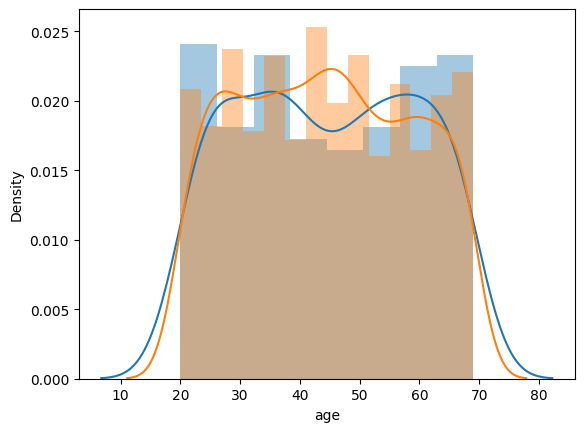

In [50]:
sns.distplot(user_data[user_data.premium == True].age)
sns.distplot(user_data[user_data.premium == False].age)


In [47]:
sns.barplot(x="lovely_brand", y="user_id", data=user_data)

0       0
1       0
2       0
3       0
4       0
       ..
2949    0
2950    0
2951    1
2952    0
2953    0
Name: premium, Length: 2954, dtype: int64